In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
housing_data = pd.read_csv('../../data/csv/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY
17001,-122.26,37.57,23.0,7995.0,1254.0,3484.0,1198.0,6.5948,404000.0,NEAR BAY
6336,-117.97,33.99,23.0,3335.0,570.0,1560.0,555.0,5.7268,300300.0,<1H OCEAN
15400,-117.22,33.22,17.0,3675.0,672.0,1693.0,597.0,3.3882,190800.0,<1H OCEAN
7588,-118.23,33.90,28.0,1108.0,284.0,1498.0,289.0,2.4706,88800.0,<1H OCEAN


In [3]:
housing_data = housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [5]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [6]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [7]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [13]:
housing_data.shape

(19475, 14)

In [14]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1951,-120.84,38.73,17.0,2616.0,492.0,1158.0,457.0,2.8807,142600.0,0,1,0,0,0
14821,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,47500.0,0,0,0,0,1
18373,-121.86,37.22,18.0,7245.0,1029.0,2893.0,1049.0,6.9508,361200.0,1,0,0,0,0
1124,-121.58,39.76,18.0,1676.0,332.0,733.0,318.0,1.7875,103800.0,0,1,0,0,0
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,1,0,0,0,0


In [15]:
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

In [16]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape, X_test.shape

((15580, 13), (3895, 13))

In [20]:
y_train.shape, y_test.shape

((15580,), (3895,))

# Training and Prediction

In [23]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(X_train, y_train)

c:\local\projects\python\pluralsight-scikit-learn\env\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [25]:
print("Training_score : ", linear_model.score(X_train, y_train))

Training_score :  0.6096325372381433


In [27]:
predictors = X_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

longitude                     -24992.523576
ocean_proximity_INLAND        -24557.202613
latitude                      -22928.821550
population                       -29.634700
total_rooms                       -8.349446
households                        43.281118
total_bedrooms                    96.662181
housing_median_age               935.519482
ocean_proximity_NEAR BAY        5929.329021
ocean_proximity_<1H OCEAN      12680.216119
ocean_proximity_NEAR OCEAN     15598.601072
median_income                  38650.989871
ocean_proximity_ISLAND        178205.273997
dtype: float64


In [29]:
y_pred = linear_model.predict(X_test)

In [30]:
df_pred_actual = pd.DataFrame({'predicted' : y_pred, 'actual' : y_test})
df_pred_actual.head(10)

,predicted,actual
16467,99159.933828,70700.0
10367,254534.315347,234800.0
10521,267905.196913,274300.0
825,227078.278542,156900.0
1288,186088.212415,133900.0
19564,141338.352537,129300.0
15406,158676.573659,172000.0
17048,360898.928064,495900.0
6192,230414.722888,176600.0
5504,250138.798496,302900.0


In [31]:
from sklearn.metrics import r2_score
print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.625501088884503


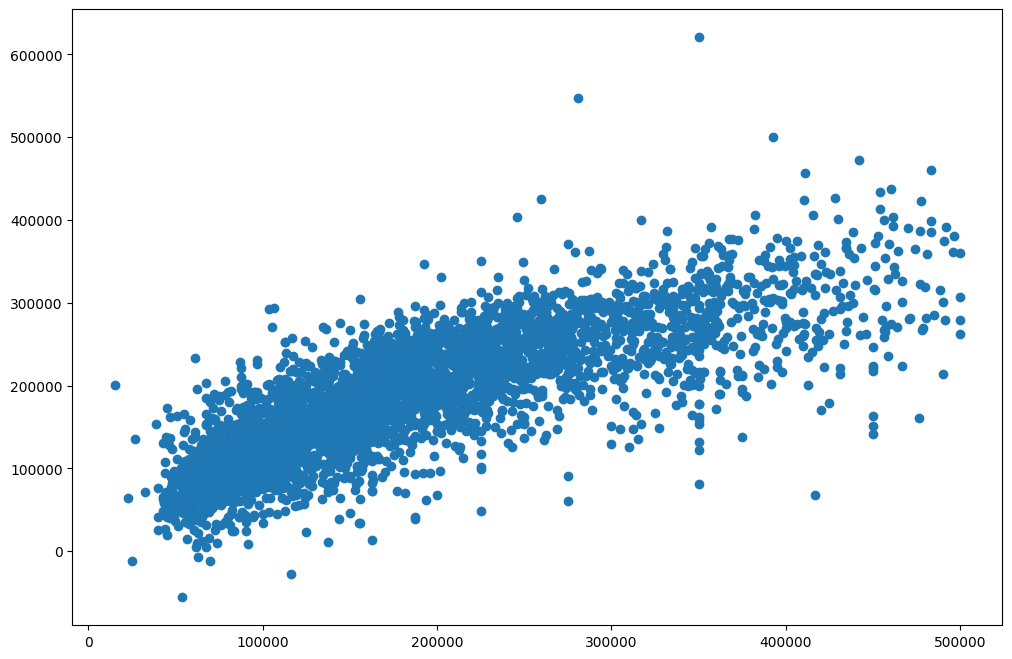

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [33]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [34]:
df_pred_actual_sample.head()

,index,predicted,actual
0,16563,196684.650035,274200.0
1,14465,374176.397547,406300.0
2,20340,257942.430349,250800.0
3,894,335389.275706,356000.0
4,2915,169915.592656,95200.0


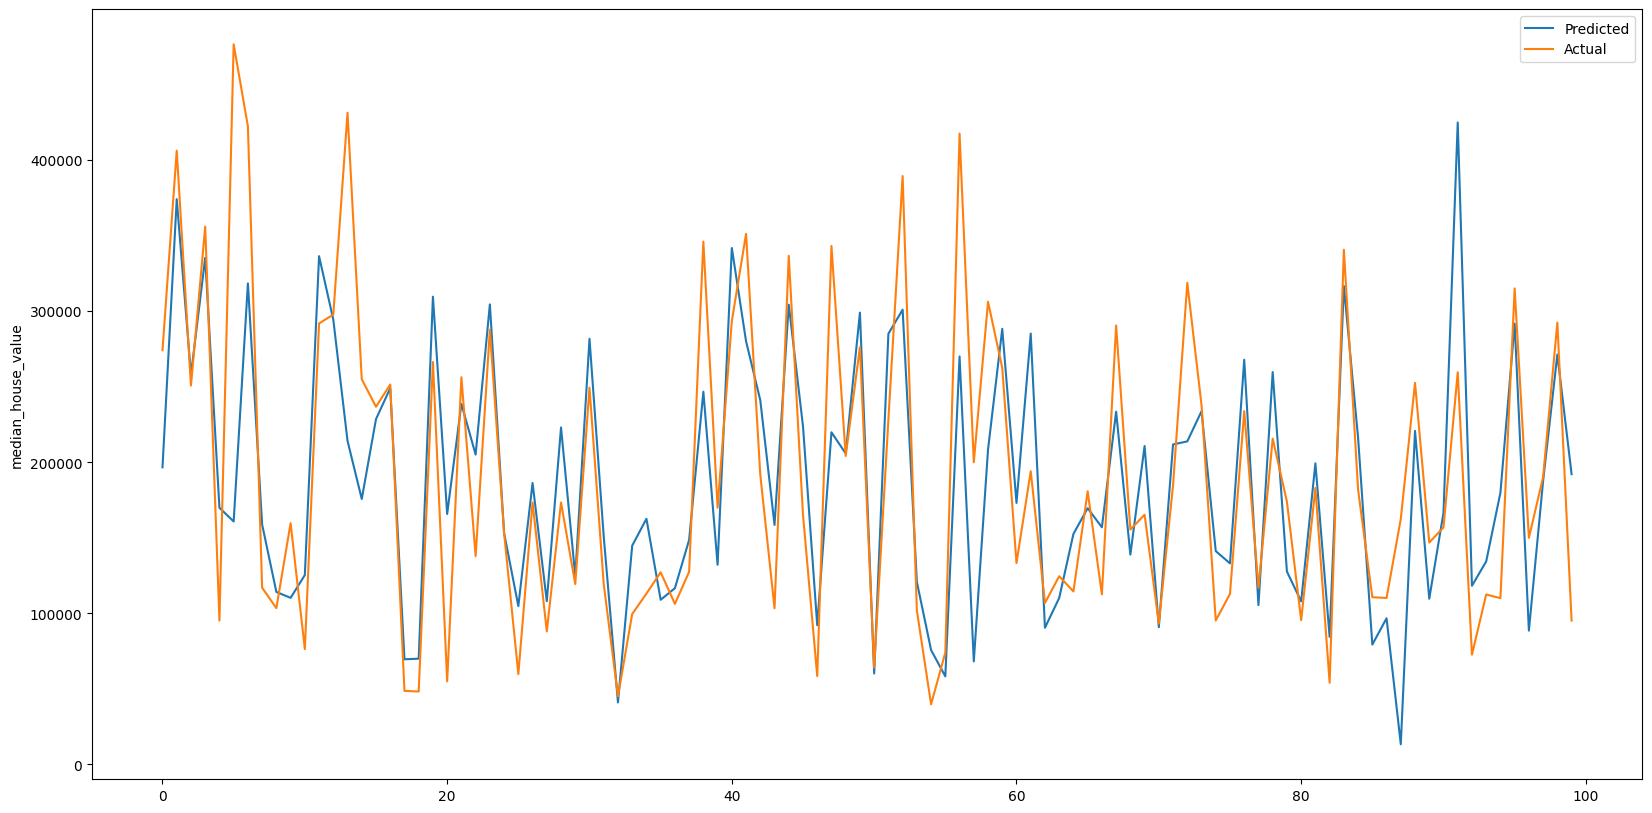

In [35]:
plt.figure(figsize = (20, 10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()